In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

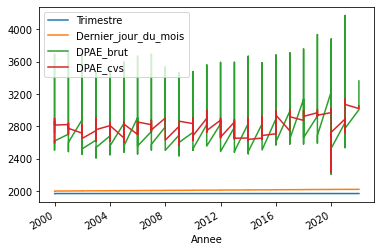

In [2]:
df = pd.read_excel("C:/Users/polin/Documents/IMT/Cours actuels/Proba/Project/Tableau_Declarations-Prealables-Embauche.xlsx", header=0, parse_dates=[0], index_col=0)
df.plot()
df.head()
plt.rcParams["figure.figsize"] = (10,5)

In [3]:
df['Dernier_jour_du_mois']=pd.DatetimeIndex(df['Dernier_jour_du_mois']).year

In [4]:
df_cdi=df[df["Nature_de_contrat"]=="CDI"]
df_cdd=df[df["Nature_de_contrat"]=="CDD de plus d'un mois"]

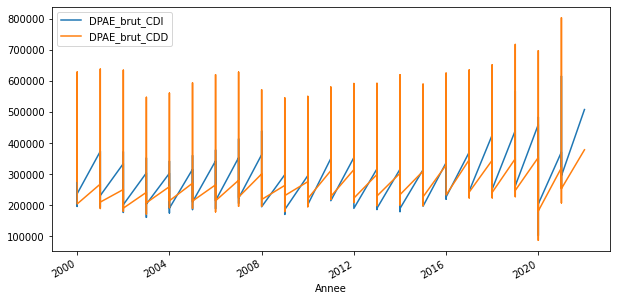

In [6]:
df_cdi["DPAE_brut"].plot(label='DPAE_brut_CDI')
df_cdd["DPAE_brut"].plot(label='DPAE_brut_CDD')
plt.legend()
plt.show()

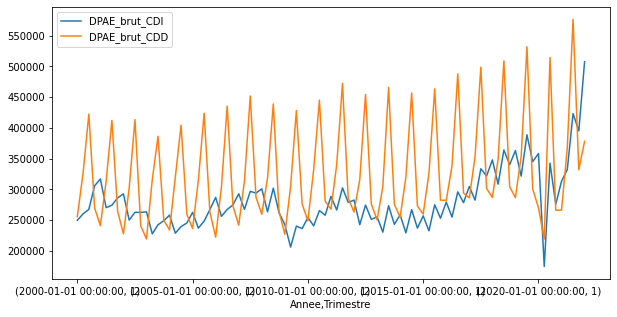

In [7]:
#Trimestriel
df_cdi_trim=df_cdi.groupby(['Annee','Trimestre']).mean()
df_cdd_trim=df_cdd.groupby(['Annee','Trimestre']).mean()
df_cdi_trim["DPAE_brut"].plot(label='DPAE_brut_CDI')
df_cdd_trim["DPAE_brut"].plot(label='DPAE_brut_CDD')
plt.legend()
plt.show()

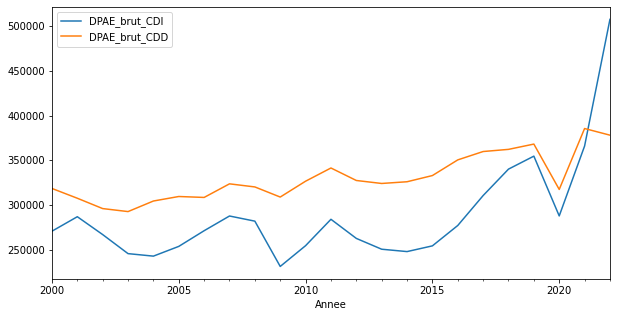

In [8]:
#Annuelle
df_cdi_an=df_cdi.groupby(['Annee']).mean()
df_cdd_an=df_cdd.groupby(['Annee']).mean()
df_cdi_an["DPAE_brut"].plot(label='DPAE_brut_CDI')
df_cdd_an["DPAE_brut"].plot(label='DPAE_brut_CDD')
plt.legend()
plt.show()

<AxesSubplot:>

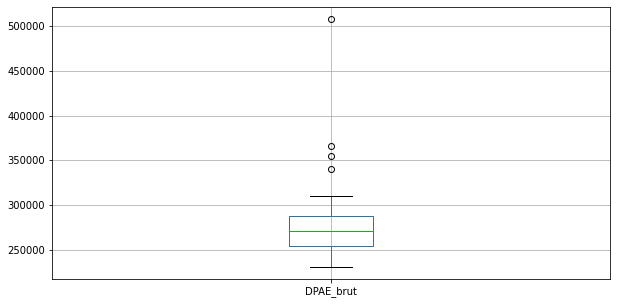

In [9]:
df_cdi_an_box=pd.DataFrame(df_cdi_an["DPAE_brut"])
df_cdi_an_box.boxplot()

In [10]:
df_essa = pd.read_excel("C:/Users/polin/Documents/IMT/Cours actuels/Proba/Project/Tableau_Emploi-Salarie-Trimestre-National_09032022.xlsx", header=0, parse_dates=[0], index_col=0, squeeze=True)

C:\Users\polin\AppData\Local\Temp/ipykernel_23408/1387900695.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df_essa = pd.read_excel("C:/Users/polin/Documents/IMT/Cours actuels/Proba/Project/Tableau_Emploi-Salarie-Trimestre-National_09032022.xlsx", header=0, parse_dates=[0], index_col=0, squeeze=True)


In [11]:
df_essa=df_essa.drop('Période', axis=1)

In [12]:
df_essa=df_essa.transpose()

In [14]:
df_essa = df_essa.replace('(O)', np.nan)

In [16]:
df_essa_drop=df_essa.drop(['idBank', 'Dernière mise à jour'], axis=0)
df_essa_sect=df_essa_drop.sum(axis=1)

<AxesSubplot:>

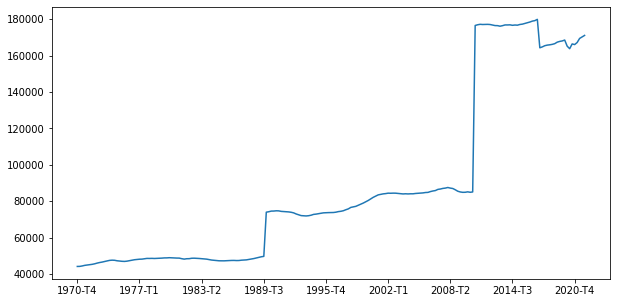

In [17]:
df_essa_sect.plot()

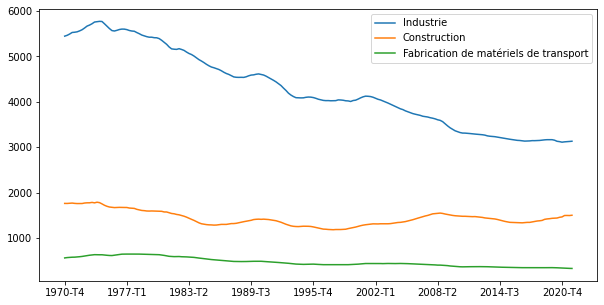

In [18]:
df_essa_drop['Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS'].plot(label='Industrie')
df_essa_drop['Emplois salariés trimestriels - Construction - Section F - CVS'].plot(label='Construction')
df_essa_drop['Emplois salariés trimestriels - Fabrication de matériels de transport - A17 : C4 - CVS'].plot(label='Fabrication de matériels de transport')
plt.legend()
plt.show()

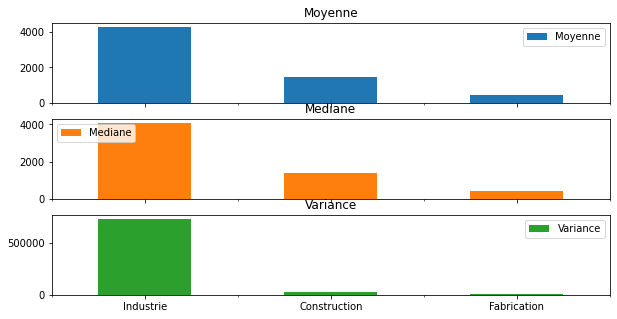

In [20]:
#Moyenne, varience par sécteur d'activité 
df_moy = pd.DataFrame({'Moyenne':[df_essa_drop['Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS'].mean(), df_essa_drop['Emplois salariés trimestriels - Construction - Section F - CVS'].mean(), df_essa_drop['Emplois salariés trimestriels - Fabrication de matériels de transport - A17 : C4 - CVS'].mean()],
                       'Mediane':[df_essa_drop['Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS'].median(), df_essa_drop['Emplois salariés trimestriels - Construction - Section F - CVS'].median(), df_essa_drop['Emplois salariés trimestriels - Fabrication de matériels de transport - A17 : C4 - CVS'].median()],
                       'Variance':[df_essa_drop['Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS'].var(), df_essa_drop['Emplois salariés trimestriels - Construction - Section F - CVS'].var(), df_essa_drop['Emplois salariés trimestriels - Fabrication de matériels de transport - A17 : C4 - CVS'].var()]},
                       index=['Industrie', 'Construction', 'Fabrication'])
axes = df_moy.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)


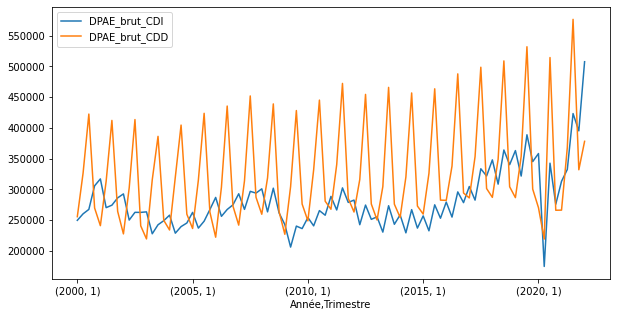

In [23]:
df_cdi=df_cdi.rename(columns={"Dernier_jour_du_mois": "Année"})
df_cdd=df_cdd.rename(columns={"Dernier_jour_du_mois": "Année"})
df_cdi_saison=df_cdi.groupby(["Année", 'Trimestre']).mean()
df_cdd_saison=df_cdd.groupby(["Année", 'Trimestre']).mean()
df_cdi_saison["DPAE_brut"].plot(label='DPAE_brut_CDI')
df_cdd_saison["DPAE_brut"].plot(label='DPAE_brut_CDD')
plt.legend()
plt.show()

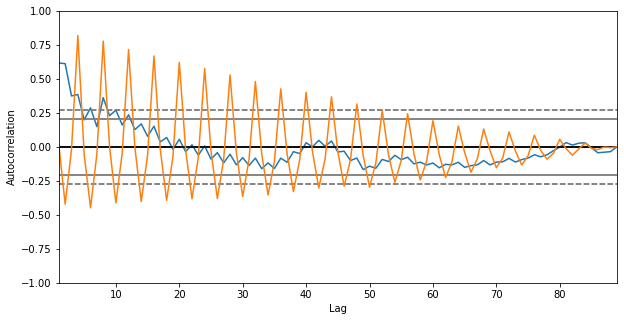

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_cdi_saison)
autocorrelation_plot(df_cdd_saison)
plt.show()

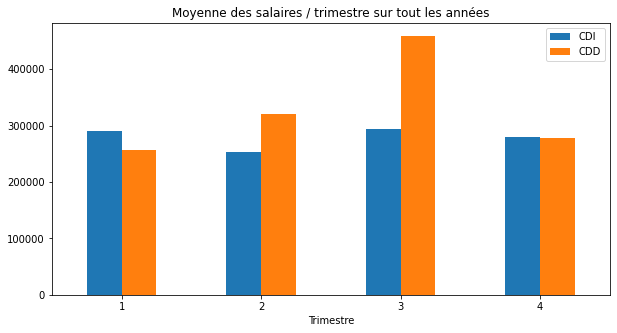

In [25]:
df_cdi_saison_trim=df_cdi.groupby(['Trimestre']).mean()
df_cdd_saison_trim=df_cdd.groupby(['Trimestre']).mean()

df_cdd_saison_trim=df_cdd_saison_trim.drop(columns=['Année','DPAE_cvs'])
df_cdi_saison_trim=df_cdi_saison_trim.drop(columns=['Année','DPAE_cvs'])
df_cdi_saison_trim=df_cdi_saison_trim.rename(columns={"DPAE_brut": "CDI"})
df_cdd_saison_trim=df_cdd_saison_trim.rename(columns={"DPAE_brut": "CDD"})
df_saison_trim=pd.concat([df_cdi_saison_trim, df_cdd_saison_trim], axis=1)
df_saison_trim.plot.bar(rot=0)
plt.title('Moyenne des salaires / trimestre sur tout les années')
plt.legend()
plt.show()

In [28]:
df_essa_time=df_essa_drop
t=pd.date_range(start='12/1970', periods=205, freq='Q')
df_essa_time.insert(0, "month", t)
df_essa_time.insert(0, "year", t)

In [30]:
df_essa_time['month']=pd.to_datetime(df_essa_time['month'],unit='D')
df_essa_time['year']=pd.to_datetime(df_essa_time['year'],unit='D')
df_essa_time['month']=pd.DatetimeIndex(df_essa_time['month']).month
df_essa_time['year']=pd.DatetimeIndex(df_essa_time['year']).year

In [31]:
df_essa_time=df_essa_time.rename(columns={"month": "trimestre"})
df_essa_time['trimestre']=df_essa_time['trimestre'].replace(3, 1)
df_essa_time['trimestre']=df_essa_time['trimestre'].replace(12, 4)
df_essa_time['trimestre']=df_essa_time['trimestre'].replace(9, 3)
df_essa_time['trimestre']=df_essa_time['trimestre'].replace(6, 2)

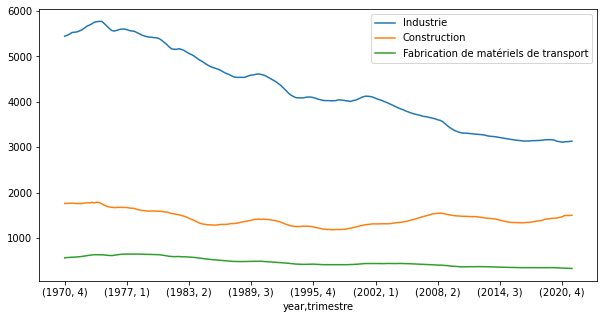

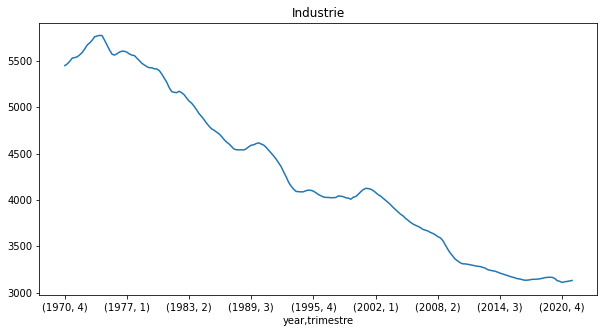

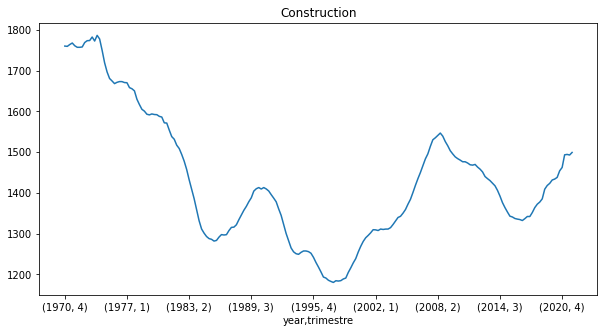

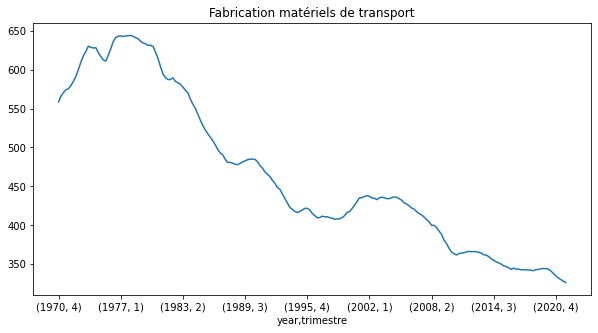

In [32]:
df_essa_trim=df_essa_time.groupby(["year", 'trimestre']).mean()
df_essa_trim=df_essa_time.groupby(["year", 'trimestre']).mean()
df_essa_trim['Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS'].plot(label='Industrie')
df_essa_trim['Emplois salariés trimestriels - Construction - Section F - CVS'].plot(label='Construction')
df_essa_trim['Emplois salariés trimestriels - Fabrication de matériels de transport - A17 : C4 - CVS'].plot(label='Fabrication de matériels de transport')
plt.legend()
plt.show()

df_essa_trim['Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS'].plot(label='Industrie')
plt.title('Industrie')
plt.show()
df_essa_trim['Emplois salariés trimestriels - Construction - Section F - CVS'].plot(label='Construction')
plt.title('Construction')
plt.show()
df_essa_trim['Emplois salariés trimestriels - Fabrication de matériels de transport - A17 : C4 - CVS'].plot(label='Fabrication de matériels de transport')
plt.title('Fabrication matériels de transport')
plt.show()

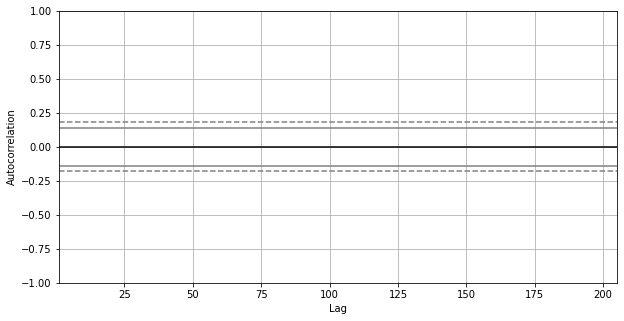

In [33]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_essa_trim)
plt.show()

In [34]:
df_essa_time=df_essa_time.rename(columns={"Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS": "Industrie", 'Emplois salariés trimestriels - Construction - Section F - CVS':'Construction', 'Emplois salariés trimestriels - Fabrication de matériels de transport - A17 : C4 - CVS':'Fabrication matériels de transport'})
df_essa_time=df_essa_time[['year','trimestre', 'Industrie', 'Construction','Fabrication matériels de transport']]

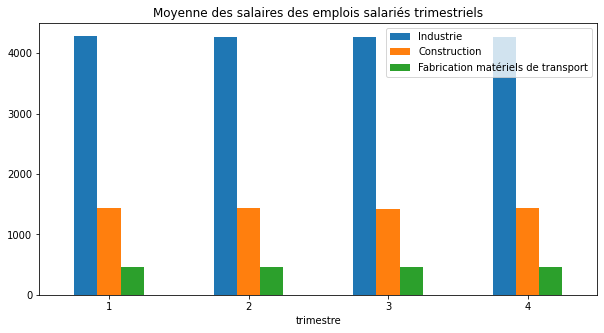

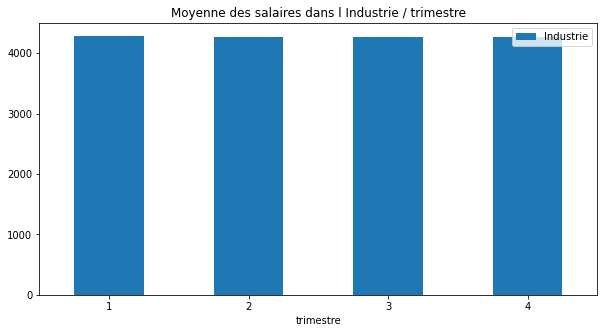

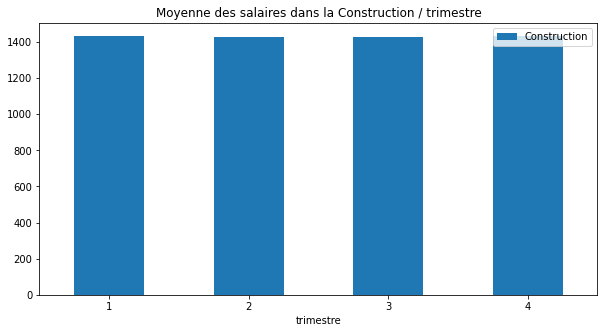

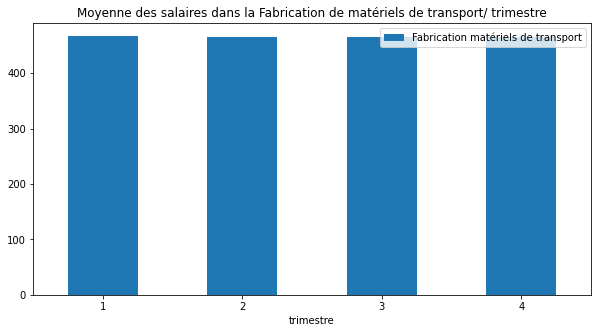

In [35]:
df_essa_trimm=df_essa_time[['trimestre', 'Industrie', 'Construction','Fabrication matériels de transport']]
df_essa_trimm=df_essa_trimm.groupby(['trimestre']).mean()
df_essa_trimm.plot.bar(rot=0)
plt.title('Moyenne des salaires des emplois salariés trimestriels')
plt.legend()
plt.show()
df_essa_indus=df_essa_trimm['Industrie']
df_essa_indus.plot.bar(rot=0)
plt.title('Moyenne des salaires dans l Industrie / trimestre')
plt.legend()
plt.show()
df_essa_const=df_essa_trimm['Construction']
df_essa_const.plot.bar(rot=0)
plt.title('Moyenne des salaires dans la Construction / trimestre')
plt.legend()
plt.show()
df_essa_fab=df_essa_trimm['Fabrication matériels de transport']
df_essa_fab.plot.bar(rot=0)
plt.title('Moyenne des salaires dans la Fabrication de matériels de transport/ trimestre')
plt.legend()
plt.show()

In [36]:
df_cdi.corrwith(df_cdd)

Trimestre    1.000000
Année        1.000000
DPAE_brut    0.522057
DPAE_cvs     0.786713
dtype: float64

In [37]:
df_corr=df[['Trimestre', 'Dernier_jour_du_mois', 'DPAE_brut', 'DPAE_cvs']]
df_corr=df_corr.groupby(['Dernier_jour_du_mois', 'Trimestre']).mean()
df_corr.drop(df_corr.tail(1).index,inplace = True)
df_corr=df_corr.reset_index()
df_corr=df_corr[['DPAE_brut', 'DPAE_cvs']]
df_corr

,DPAE_brut,DPAE_cvs
0,252593.500000,278123.166667
1,293273.666667,303425.166667
2,344901.833333,298367.166667
3,287720.000000,308666.166667
4,278960.166667,304844.833333
...,...,...
83,270900.166667,298756.333333
84,289657.833333,317505.333333
85,349915.000000,365094.833333
86,499857.833333,403980.833333


In [38]:
df_essa_since2000=df_essa_time[df_essa_drop['year']>=2000]
df_essa_since2000=df_essa_since2000.groupby(['year', 'trimestre']).mean()
df_essa_since2000=df_essa_since2000.reset_index()
df_essa_since2000=df_essa_since2000[['Industrie', 'Construction', 'Fabrication matériels de transport']]
df_essa_since2000

Libellé,Industrie,Construction,Fabrication matériels de transport
0,4036.3,1238.9,417.6
1,4060.2,1255.0,421.4
2,4087.4,1269.0,425.8
3,4110.2,1281.0,430.3
4,4124.9,1290.0,435.2
...,...,...,...
83,3110.2,1462.5,335.0
84,3117.4,1493.5,332.4
85,3120.8,1494.5,330.2
86,3126.3,1493.0,328.1


In [39]:
df_join = df_corr.join(df_essa_since2000)
corr=df_join.corr()
corr

,DPAE_brut,DPAE_cvs,Industrie,Construction,Fabrication matériels de transport
DPAE_brut,1.000000,0.653201,-0.295145,0.097022,-0.346807
DPAE_cvs,0.653201,1.000000,-0.473742,0.133027,-0.559981
Industrie,-0.295145,-0.473742,1.000000,-0.441641,0.967865
Construction,0.097022,0.133027,-0.441641,1.000000,-0.332215
Fabrication matériels de transport,-0.346807,-0.559981,0.967865,-0.332215,1.000000


<AxesSubplot:>

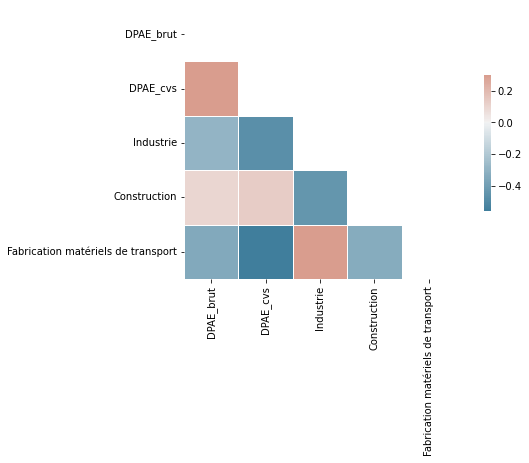

In [40]:
import seaborn as sns
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:xlabel='Annee'>

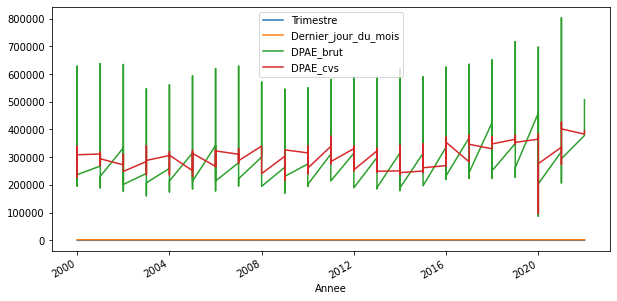

In [41]:
df.plot()

In [56]:
df_exp = pd.read_excel("C:/Users/polin/Documents/IMT/Cours actuels/Proba/Project/Tableau_Declarations-Prealables-Embauche.xlsx", header=0, parse_dates=[0], index_col=0)

In [57]:
df_exp.index=df_exp["Dernier_jour_du_mois"]
df_exp=df_exp.drop("Dernier_jour_du_mois",axis=1)
cdd=df_exp.loc[df_exp["Nature_de_contrat"]=="CDD de plus d'un mois"]
cdi=df_exp.loc[df_exp["Nature_de_contrat"]=="CDI"]

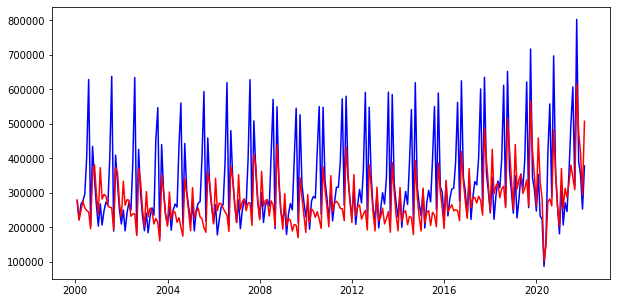

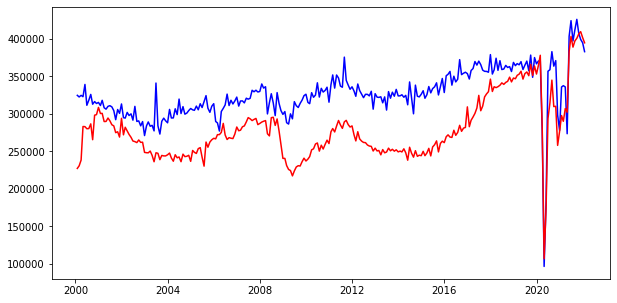

In [60]:
def simple_exp(s,alpha):
    if len(s)==1:
        return s[0]
    else:
        return alpha*s[-1]+(1-alpha)*simple_exp(s[:-1],alpha)

#On prend alpha=0.6
alpha=0.6

#On sépare le DPAE_brut du DPAE_cvs pour les cdi et les cdd
s=cdd['DPAE_brut']
dp=cdd['DPAE_cvs']
DPAE_BRUT_pred=simple_exp(s[:-1],alpha)
s2=cdi['DPAE_brut']
dp2=cdi['DPAE_cvs']

#On observe les courbes obtenues

plt.plot(s.index,s.values,'b-')
plt.plot(s.index,s2.values,'r-')
plt.show()
#On constate un motif pour les cdd et les cdi pour le DPAE_brut

plt.plot(s.index,dp.values,'b-')
plt.plot(s.index,dp2.values,'r-')
plt.show()
# On n'observe pas de saisonnalité pou le DPAE_cvs, ni de tendance
#On programme un lissage exponentiel simple :




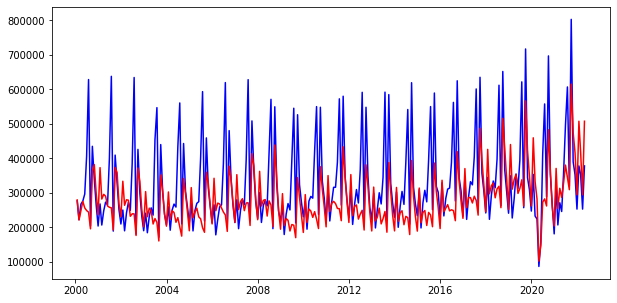

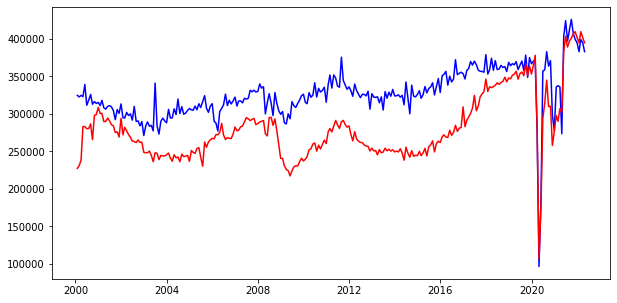

In [61]:
for i in range(3):
    val=s.values
    val2=dp.values
    val3=s2.values
    val4=dp2.values
    nouvelle_valeur=simple_exp(val,alpha)
    nouvelle_valeur2=simple_exp(val2,alpha)
    nouvelle_valeur3=simple_exp(val3,alpha)
    nouvelle_valeur4=simple_exp(val4,alpha)
    np.append(val,nouvelle_valeur)
    np.append(val2,nouvelle_valeur2)
    np.append(val3,nouvelle_valeur3)
    np.append(val4,nouvelle_valeur4)


nouvelle_serie=pd.Series(val[-3:],index=pd.date_range('2022-02-01', periods=3,freq='M'))
nouvelle_serie2=pd.Series(val2[-3:],index=pd.date_range('2022-02-01', periods=3,freq='M'))
nouvelle_serie3=pd.Series(val3[-3:],index=pd.date_range('2022-02-01', periods=3,freq='M'))
nouvelle_serie4=pd.Series(val4[-3:],index=pd.date_range('2022-02-01', periods=3,freq='M'))

predi=pd.concat([s,nouvelle_serie])
predi2=pd.concat([dp,nouvelle_serie2])
predi3=pd.concat([s2,nouvelle_serie3])
predi4=pd.concat([dp2,nouvelle_serie4])


plt.plot(predi.index,predi.values,'b-')
plt.plot(predi.index,predi3.values,'r-')
plt.show()

#On constate que pour les prédictions des DPAE_brut, la prédiction est mauvaise, on perd le motif. C'est logique car le lissage exponentiel simple n'est pas adapté à des données saisonnières.
#On constate que pour les DPAE_brut (en bleu), la prédiction est mauvaise. Il n'y a pas de répétition du motif saisonnier.


plt.plot(predi2.index,predi2.values,'b-')
plt.plot(predi2.index,predi4.values,'r-')
plt.show()

In [62]:
from pandas.plotting import autocorrelation_plot

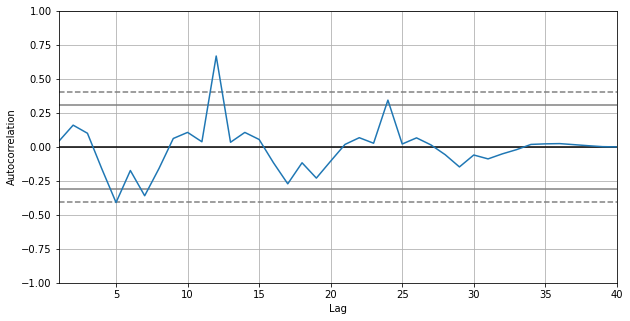

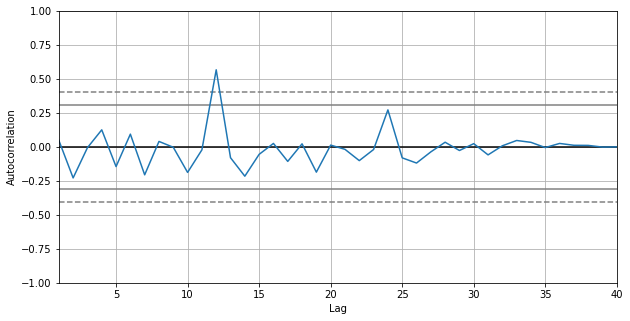

In [63]:
autocorrelation_plot(s[0:40])
plt.show()
autocorrelation_plot(s2[0:40])
plt.show()

In [64]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt
from pandas.plotting import autocorrelation_plot
import math

In [65]:
l=len(s)
p=l-4
s_train=s[:p]
s_valid=s[p:]
s2_train=s2[:p]
s2_valid=s2[p:]
dp_train=dp[:p]
dp_valid=dp[p:]
dp2_train=dp2[:p]
dp2_valid=dp2[p:]

C:\Users\polin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


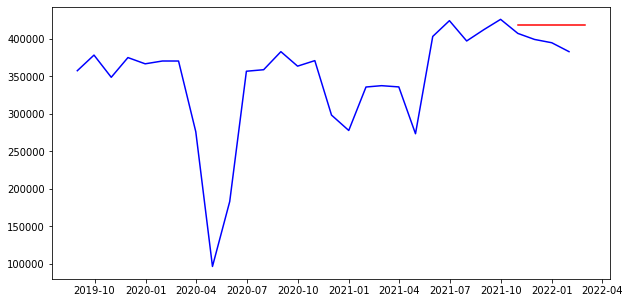

In [66]:
fit1=SimpleExpSmoothing(dp_train,initialization_method="heuristic").fit(smoothing_level=0.6, optimized=False)
predict=fit1.forecast(l-p+1)
plt.plot(dp[-30:],'b-',label="DPAE_cvs")
plt.plot(predict,'r-',label="prédiction")
plt.show()

C:\Users\polin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


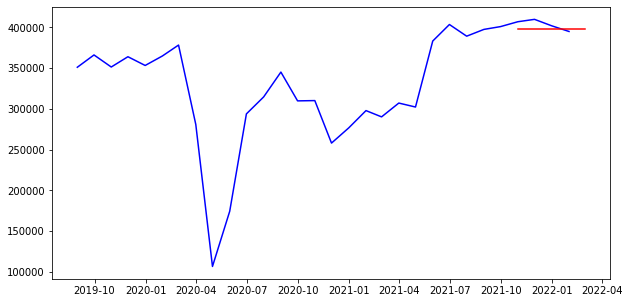

In [67]:
fit2=SimpleExpSmoothing(dp2_train,initialization_method="heuristic").fit(smoothing_level=0.6, optimized=False)
predict2=fit2.forecast(l-p+1)
plt.plot(dp2[-30:],'b-',label="DPAE_cvs")
plt.plot(predict2,'r-',label="prédiction")
plt.show()

#La prédiction n'est pas très bonne, elle reste constante, ce qui est normal pour ce mo

C:\Users\polin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


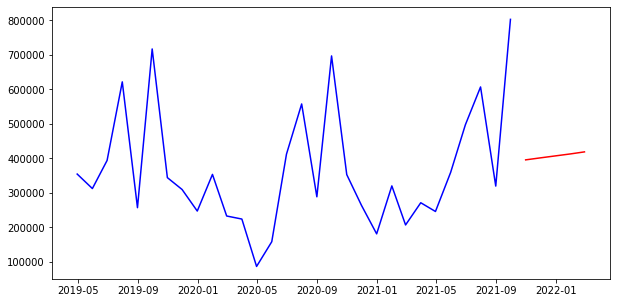

In [68]:
fit3=ExponentialSmoothing(s_train, seasonal_periods=12, trend='add',initialization_method="estimated", dates=s_train.index,freq='M').fit()
predict3=fit3.forecast(l-p+1)
plt.plot(s_train[-30:],'b-',label="DPAE_cvs")
plt.plot(predict3,'r-',label="prédiction")
plt.show()

C:\Users\polin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


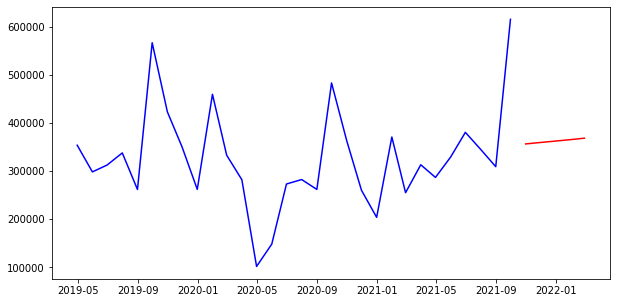

In [69]:
fit4=ExponentialSmoothing(s2_train, seasonal_periods=12, trend='add',initialization_method="estimated", dates=s_train.index,freq='M').fit()
predict4=fit4.forecast(l-p+1)
plt.plot(s2_train[-30:],'b-',label="DPAE_cvs")
plt.plot(predict4,'r-',label="prédiction")
plt.show()

In [70]:
train_essa=df_essa_time[:-4]
test_essa=df_essa_time[len(df_essa_time)-4:]

In [71]:
df_essa_time=df_essa_time[['year','trimestre', 'Industrie', 'Construction','Fabrication matériels de transport']]

In [72]:
df_essa_time

Libellé,year,trimestre,Industrie,Construction,Fabrication matériels de transport
time,,,,,
1970-12-31,1970,4,5447.9,1760.3,558.5
1971-03-31,1971,1,5466.3,1759.6,566.1
1971-06-30,1971,2,5494.7,1764.1,570.6
1971-09-30,1971,3,5529.1,1767.8,574.3
1971-12-31,1971,4,5534.1,1761.1,575.4
...,...,...,...,...,...
2020-12-31,2020,4,3110.2,1462.5,335
2021-03-31,2021,1,3117.4,1493.5,332.4
2021-06-30,2021,2,3120.8,1494.5,330.2


<AxesSubplot:xlabel='time'>

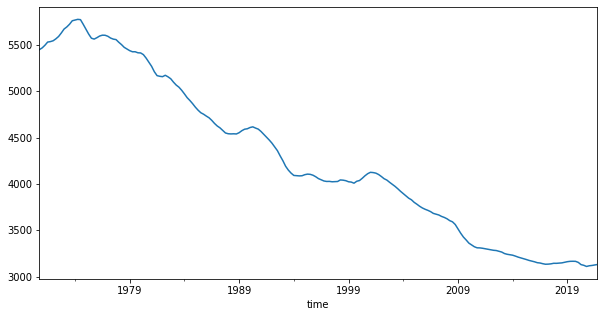

In [73]:
df_essa_time['Industrie'].plot()

In [74]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [75]:
fit = SimpleExpSmoothing(train_essa['Industrie'].values, initialization_method="estimated").fit()
fit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.993375,True
initial_level,l.0,5433.461428,True


In [76]:
fit_indus = SimpleExpSmoothing(train_essa['Industrie'].values, initialization_method="heuristic").fit(
    smoothing_level=0.993375, optimized=True)
forecast = fit_indus.forecast(5)
full_curve = np.concatenate((fit_indus.fittedvalues, forecast))
t=pd.date_range(start='12/1970', periods=206, freq='Q')
df_essa_pred_indus=pd.DataFrame(full_curve,t)
df_essa_pred_indus=df_essa_pred_indus.rename(columns={0:'Emplois salariés trimestriels'})

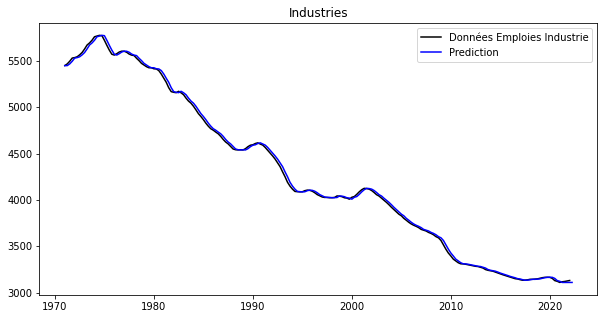

In [77]:
plt.plot(df_essa_time['Industrie'], color="black", label='Données Emploies Industrie')
plt.plot(df_essa_pred_indus['Emplois salariés trimestriels'], color="blue", label='Prediction')
plt.legend()
plt.title('Industries')
plt.show()

In [78]:
df_essa_pred_indus[-5:]

,Emplois salariés trimestriels
2021-03-31,3110.26169
2021-06-30,3110.26169
2021-09-30,3110.26169
2021-12-31,3110.26169
2022-03-31,3110.26169


In [79]:
fit = SimpleExpSmoothing(train_essa['Construction'].values, initialization_method="estimated").fit()
fit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.996802,True
initial_level,l.0,1761.759603,True


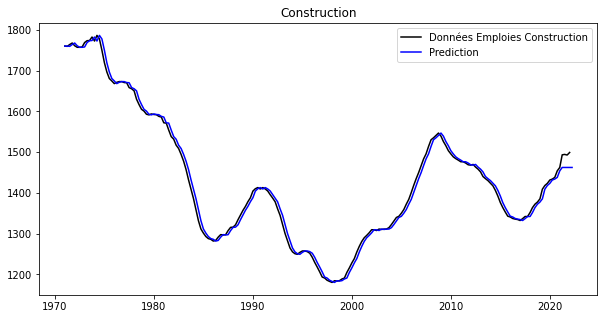

In [80]:
fit_construct = SimpleExpSmoothing(train_essa['Construction'].values, initialization_method="heuristic").fit(
    smoothing_level=0.996802, optimized=True)
forecast = fit_construct.forecast(5)
full_curve = np.concatenate((fit_construct.fittedvalues, forecast))
df_essa_pred_const=pd.DataFrame(full_curve,t)
df_essa_pred_const=df_essa_pred_const.rename(columns={0:'Emplois salariés trimestriels'})
plt.plot(df_essa_time['Construction'], color="black", label='Données Emploies Construction')
plt.plot(df_essa_pred_const['Emplois salariés trimestriels'], color="blue", label='Prediction')
plt.legend()
plt.title('Construction')
plt.show()

In [81]:
df_essa_pred_const[-5:]

,Emplois salariés trimestriels
2021-03-31,1462.492917
2021-06-30,1462.492917
2021-09-30,1462.492917
2021-12-31,1462.492917
2022-03-31,1462.492917


In [82]:
fit = SimpleExpSmoothing(df_essa_time['Fabrication matériels de transport'].values, initialization_method="estimated").fit()
fit.params_formatted

,name,param,optimized
smoothing_level,alpha,1.0,True
initial_level,l.0,558.5,True


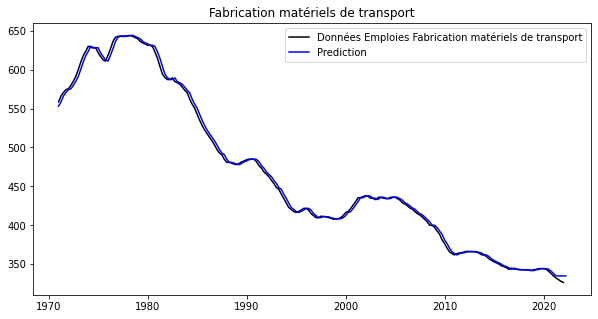

In [83]:
fit_fab = SimpleExpSmoothing(train_essa['Fabrication matériels de transport'].values, initialization_method="heuristic").fit(
    smoothing_level=1, optimized=True)
forecast = fit_fab.forecast(5)
full_curve = np.concatenate((fit_fab.fittedvalues, forecast))
df_essa_pred_fab=pd.DataFrame(full_curve,t)
df_essa_pred_fab=df_essa_pred_fab.rename(columns={0:'Emplois salariés trimestriels'})
plt.plot(df_essa_time['Fabrication matériels de transport'], color="black", label='Données Emploies Fabrication matériels de transport')
plt.plot(df_essa_pred_fab['Emplois salariés trimestriels'], color="blue", label='Prediction')
plt.legend()
plt.title('Fabrication matériels de transport')
plt.show()

In [84]:
df_essa_pred_fab[-5:]

,Emplois salariés trimestriels
2021-03-31,335.0
2021-06-30,335.0
2021-09-30,335.0
2021-12-31,335.0
2022-03-31,335.0


In [85]:
from sklearn.metrics import mean_squared_error
mean_squared_error(dp_valid.values, predict3[-5:-1].values, squared=False)

17194.260642115838

In [86]:
def erreur_pourcent(test, prend):
    err=0
    n=len(test)
    for i in range(n):
        err+=(100*(prend[i]-test[i])/test[i])
    return (1/n)*abs(err)

In [87]:
erreur_pourcent(dp_valid.values, predict3[-5:-1].values)

2.1110271400210947

In [88]:
mean_squared_error(test_essa['Industrie'].values, df_essa_pred_indus[-5:-1].values, squared=False)

14.678634738884545

In [89]:
erreur_pourcent(test_essa['Industrie'].values, df_essa_pred_indus[-5:-1].values)

array([0.43788661])

In [117]:
from statsmodels.tsa.arima.model import ARIMA
arma_model = ARIMA(s_train, order=(3,0,0)).fit()
arima_indus=arma_model.predict(predict.index[0],predict.index[-1])
arima_indus

C:\Users\polin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\polin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\polin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


2021-10-31    343879.865281
2021-11-30    459023.617914
2021-12-31    367727.886055
2022-01-31    365217.989887
2022-02-28    348669.557217
Freq: M, Name: predicted_mean, dtype: float64

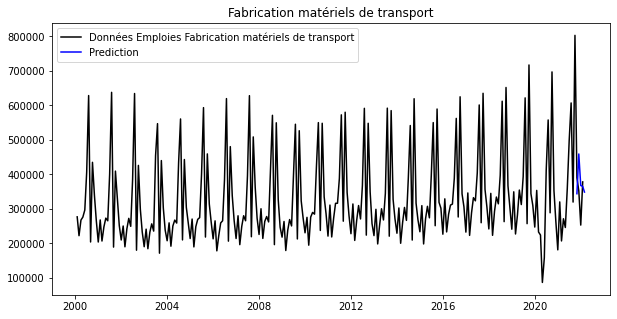

In [121]:
plt.plot(s, color="black", label='Données Emploies Fabrication matériels de transport')
plt.plot(arima_indus, color="blue", label='Prediction')
plt.legend()
plt.title('Fabrication matériels de transport')
plt.show()

In [118]:
mean_squared_error(dp_valid.values, arima_indus[:-1], squared=False)

46542.14240599215

In [119]:
erreur_pourcent(dp_valid.values, arima_indus[:-1])

3.0730216760120315

In [468]:
predict3['2022-02-28']

418763.8433331184

In [469]:
predict4['2022-02-28']

368395.9373797813

In [391]:
df_essa_pred_indus.loc['2022-03-31']

Emplois salariés trimestriels    3110.26169
Name: 2022-03-31 00:00:00, dtype: float64

In [392]:
df_essa_pred_const.loc['2022-03-31']

Emplois salariés trimestriels    1462.492917
Name: 2022-03-31 00:00:00, dtype: float64